In [1]:
import numpy as np
import pandas as pd
import itertools 
import matplotlib.pyplot as plt


from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

from scipy import stats
from scipy.spatial import distance


## Loading and join the four results (for each feature set)

In [8]:
samples=21

try:
    resultsTest=pd.read_csv("Test9_rTime/ResultsExperiment/CollectedNew_FeatureSet_1_startPerson_1_endPerson_1.csv")
    if len(resultsTest)!=samples:
        print('error'+' 1'+' 1')
        print(len(resultsTest))

except FileNotFoundError:
    print('FileNotFoundError'+' '+str(1)+' '+str(1))   

for i in range(2,61):
    try:
        auxFrame=pd.read_csv("Test9_rTime/ResultsExperiment/CollectedNew_FeatureSet_1_startPerson_"+str(i)+"_endPerson_"+str(i)+".csv")
        resultsTest=pd.concat([resultsTest,auxFrame],ignore_index=True)
        if len(auxFrame)!=samples:
            print('error'+' 1 '+str(i))
            print(len(auxFrame))
    except:
        print('FileNotFoundError'+' '+str(1)+' '+str(i)) 
            
    
     
        
for j in range(2,4):
    for i in range(1,61):
        try:
            auxFrame=pd.read_csv("Test9_rTime/ResultsExperiment/CollectedNew_FeatureSet_"+str(j)+"_startPerson_"+str(i)+"_endPerson_"+str(i)+".csv")
            resultsTest=pd.concat([resultsTest,auxFrame],ignore_index=True)

            if len(auxFrame)!=samples:
                print('error'+' '+str(j)+' '+str(i))
                print(len(auxFrame))
        except:
            print('FileNotFoundError'+' '+str(j)+' '+str(i))
        
        

resultsTest2=resultsTest.copy()
resultsTest2.drop(columns='Unnamed: 0')


,person,subset,# shots,Feature Set,AccLDAInd,AccLDALiu,AccLDA10BB,AccLDA11BB,AccLDA10BBcl,AccLDA11BBcl,...,AccSVM10BBq,AccSVM11BBq,r10BBl,r11BBl,r10BBq,r11BBq,r10BBlmean,r11BBlmean,r10BBqmean,r11BBqmean
0,1,5,5,1,0.837128,0.846772,0.845165,0.841682,0.976,0.960,...,0.848915,0.844361,[0.9746323 0.88809146 0.76756389 0.92559833 0...,[0.90847458 0.56529517 0.49905258 0.67951108 0...,[0.76491342 0.74981088 0.70994925 0.85975806 0...,[0.50261671 0.55224507 0.51389522 0.51435919 0...,0.849254,0.629496,0.766542,0.522310
1,1,6,6,1,0.834450,0.846772,0.845433,0.841950,0.976,0.960,...,0.848111,0.849451,[0.9767786 0.90068573 0.7446522 0.9199333 0...,[0.93233083 0.56869674 0.4894356 0.61864407 0...,[0.75770263 0.76579519 0.69248228 0.85372206 0...,[0.5 0.56112906 0.51521829 0.51958877 0...,0.846432,0.622373,0.762411,0.525406
2,1,7,7,1,0.833914,0.846504,0.845701,0.843290,0.968,0.960,...,0.848379,0.850522,[0.96021178 0.90249717 0.75915464 0.91808432 0...,[0.85681558 0.58357102 0.50641026 0.61403509 0...,[0.71589566 0.77659175 0.67482017 0.83287037 0...,[0.5 0.57330866 0.51388889 0.53101568 0...,0.847902,0.616337,0.747956,0.528789
3,1,8,8,1,0.831771,0.848111,0.845701,0.843557,0.968,0.960,...,0.849719,0.849987,[0.95651668 0.90370635 0.75080444 0.91779566 0...,[0.85172414 0.59366755 0.50561798 0.60240964 0...,[0.70072544 0.77672671 0.66413941 0.821565 0...,[0.50282087 0.57636566 0.51495554 0.53650119 0...,0.845715,0.615455,0.738839,0.530778
4,1,9,9,1,0.826949,0.848379,0.844897,0.848111,0.968,0.968,...,0.852130,0.852398,[0.95319762 0.90798419 0.74039653 0.92105446 0...,[0.83157895 0.65391717 0.50306748 0.60377358 0...,[0.69188768 0.78664774 0.63953516 0.81272237 0...,[0.5088042 0.59728507 0.51351351 0.5229304 0...,0.842532,0.624475,0.730035,0.531258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3775,60,21,21,3,0.529649,0.493426,0.517574,0.493963,0.544,0.504,...,0.466595,0.492353,[0.85531385 0.91183735 0.88346518 0.7832904 0...,[0.51320096 0.92641363 0.75743262 0.63654864 0...,[0.53253499 0.53099656 0.53018706 0.55456288 0...,[0.52 0.51960784 0.51269036 0.51758794 0...,0.857887,0.696675,0.534680,0.518283
3776,60,22,22,3,0.527770,0.491816,0.513013,0.484572,0.536,0.496,...,0.462570,0.493158,[0.86031201 0.91779322 0.89119764 0.78068614 0...,[0.51707541 1. 0.77900552 0.6269791 0...,[0.53136905 0.52475454 0.5282823 0.55444643 0...,[0.52238806 0.52014491 0.52040816 0.52525253 0...,0.858568,0.710127,0.532508,0.524043
3777,60,23,23,3,0.524282,0.490743,0.510867,0.483230,0.536,0.504,...,0.461765,0.495841,[0.85989996 0.91545949 0.89172647 0.77998849 0...,[0.51633298 1. 0.77039656 0.6256994 0...,[0.52894483 0.52434626 0.52715426 0.55421768 0...,[0.5215311 0.51936495 0.51923077 0.52427184 0...,0.857664,0.703294,0.531803,0.523484
3778,60,24,24,3,0.521867,0.489402,0.515428,0.499329,0.552,0.528,...,0.467400,0.496646,[0.89155559 0.92148617 0.90816355 0.97600235 0...,[0.51354062 0.96061644 0.86746988 0.95948827 0...,[0.5327742 0.53517683 0.53176609 0.55619261 0...,[0.53398058 0.5267746 0.52941176 0.52941176 0...,0.906429,0.783995,0.545589,0.531093


## Results of each feature set and each shot (Mean and Median of the Accuracies, T-test, and Wilcoxon test) 

In [13]:
results= pd.DataFrame(columns=['Data set', 'Feature Set', '# shots','Classifier'])

                                         

idx=0
for i in range(5,26):
    for j in range(1,4):
        
        results.at[idx,'rPropo1LDA']=resultsTest2['r10BBlmean'].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
        results.at[idx,'rPropo2LDA']=resultsTest2['r11BBlmean'].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
        results.at[idx,'rPropo1QDA']=resultsTest2['r10BBqmean'].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
        results.at[idx,'rPropo2QDA']=resultsTest2['r11BBqmean'].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
        
#         results.at[idx,'rPropo1LDAVec']=resultsTest2['r10BBl'].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
#         results.at[idx,'rPropo2LDAVec']=resultsTest2['r11BBl'].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
#         results.at[idx,'rPropo1QDAVec']=resultsTest2['r10BBq'].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
#         results.at[idx,'rPropo2QDAVec']=resultsTest2['r11BBq'].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
         
        
        
        for k in range(0,4):
            if k==0:
                classifier='LDA'
                indi='AccLDAInd'
                indiGen='AccLDAInd'
                liu='AccLDALiu'            
                
                prosed10BBLDA='AccLDA10BB'                
                prosed11BBLDA='AccLDA11BB'
                prosed10BBLDAcl='AccLDA10BBcl'                
                prosed11BBLDAcl='AccLDA11BBcl'
                
                results.at[idx,'Classifier']=classifier
#                 results.at[idx,'Ind']=resultsTest1[indi].loc[(resultsTest1['# shots'] == i)&(resultsTest1['Feature Set'] == j)].mean(axis=0)
#                 results.at[idx,'IndGen']=resultsTest1[indiGen].loc[(resultsTest1['# shots'] == i)&(resultsTest1['Feature Set'] == j)].mean(axis=0)
#                 results.at[idx,'liu']=resultsTest1[liu].loc[(resultsTest1['# shots'] == i)&(resultsTest1['Feature Set'] == j)].mean(axis=0)

                results.at[idx,'IndPca']=resultsTest2[indi].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'IndGenPca']=resultsTest2[indiGen].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'liuPca']=resultsTest2[liu].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)


                results.at[idx,'Prop1LDA']=resultsTest2[prosed10BBLDA].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'Prop2LDA']=resultsTest2[prosed11BBLDA].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
#                 results.at[idx,'Prop1QDA']=resultsTest2[prosed10BBQDA].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
#                 results.at[idx,'Prop2QDA']=resultsTest2[prosed11BBQDA].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)

                results.at[idx,'Prop1LDAcl']=resultsTest2[prosed10BBLDAcl].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'Prop2LDAcl']=resultsTest2[prosed11BBLDAcl].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
#                 results.at[idx,'Prop1QDAcl']=resultsTest2[prosed10BBQDAcl].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
#                 results.at[idx,'Prop2QDAcl']=resultsTest2[prosed11BBQDAcl].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
            
                
                
                
            elif k==1:
                classifier='QDA'
                indi='AccQDAInd'
                indiGen='AccQDAInd'
                liu='AccQDALiu'    
                
                prosed10BBQDA='AccQDA10BB'                
                prosed11BBQDA='AccQDA11BB'
                prosed10BBQDAcl='AccQDA10BBcl'                
                prosed11BBQDAcl='AccQDA11BBcl'
                
                results.at[idx,'Classifier']=classifier
#                 results.at[idx,'Ind']=resultsTest1[indi].loc[(resultsTest1['# shots'] == i)&(resultsTest1['Feature Set'] == j)].mean(axis=0)
#                 results.at[idx,'IndGen']=resultsTest1[indiGen].loc[(resultsTest1['# shots'] == i)&(resultsTest1['Feature Set'] == j)].mean(axis=0)
#                 results.at[idx,'liu']=resultsTest1[liu].loc[(resultsTest1['# shots'] == i)&(resultsTest1['Feature Set'] == j)].mean(axis=0)

                results.at[idx,'IndPca']=resultsTest2[indi].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'IndGenPca']=resultsTest2[indiGen].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'liuPca']=resultsTest2[liu].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)


#                 results.at[idx,'Prop1LDA']=resultsTest2[prosed10BBLDA].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
#                 results.at[idx,'Prop2LDA']=resultsTest2[prosed11BBLDA].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'Prop1QDA']=resultsTest2[prosed10BBQDA].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'Prop2QDA']=resultsTest2[prosed11BBQDA].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)

#                 results.at[idx,'Prop1LDAcl']=resultsTest2[prosed10BBLDAcl].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
#                 results.at[idx,'Prop2LDAcl']=resultsTest2[prosed11BBLDAcl].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'Prop1QDAcl']=resultsTest2[prosed10BBQDAcl].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'Prop2QDAcl']=resultsTest2[prosed11BBQDAcl].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
            
                
                
                
            elif k==2:
                classifier='KNN'
                indi='AccKNNInd'
                indiGen='AccKNNInd'
                liu='AccKNNLiu'               
                
                prosed10BBLDA='AccKNN10BBl'                
                prosed11BBLDA='AccKNN11BBl'
                prosed10BBQDA='AccKNN10BBq'                
                prosed11BBQDA='AccKNN11BBq'
                
                
                results.at[idx,'Classifier']=classifier
#                 results.at[idx,'Ind']=resultsTest1[indi].loc[(resultsTest1['# shots'] == i)&(resultsTest1['Feature Set'] == j)].mean(axis=0)
#                 results.at[idx,'IndGen']=resultsTest1[indiGen].loc[(resultsTest1['# shots'] == i)&(resultsTest1['Feature Set'] == j)].mean(axis=0)
#                 results.at[idx,'liu']=resultsTest1[liu].loc[(resultsTest1['# shots'] == i)&(resultsTest1['Feature Set'] == j)].mean(axis=0)

                results.at[idx,'IndPca']=resultsTest2[indi].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'IndGenPca']=resultsTest2[indiGen].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'liuPca']=resultsTest2[liu].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)


                results.at[idx,'Prop1LDA']=resultsTest2[prosed10BBLDA].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'Prop2LDA']=resultsTest2[prosed11BBLDA].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'Prop1QDA']=resultsTest2[prosed10BBQDA].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'Prop2QDA']=resultsTest2[prosed11BBQDA].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)

#                 results.at[idx,'Prop1LDAcl']=resultsTest2[prosed10BBLDAcl].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
#                 results.at[idx,'Prop2LDAcl']=resultsTest2[prosed11BBLDAcl].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
#                 results.at[idx,'Prop1QDAcl']=resultsTest2[prosed10BBQDAcl].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
#                 results.at[idx,'Prop2QDAcl']=resultsTest2[prosed11BBQDAcl].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
            
               
                
                
            else:
                classifier='SVM'
                indi='AccSVMInd'
                indiGen='AccSVMInd'
                liu='AccSVMLiu'               
                
                prosed10BBLDA='AccSVM10BBl'                
                prosed11BBLDA='AccSVM11BBl'
                prosed10BBQDA='AccSVM10BBq'                
                prosed11BBQDA='AccSVM11BBq'

                
                    
                    
                results.at[idx,'Classifier']=classifier
#                 results.at[idx,'Ind']=resultsTest1[indi].loc[(resultsTest1['# shots'] == i)&(resultsTest1['Feature Set'] == j)].mean(axis=0)
#                 results.at[idx,'IndGen']=resultsTest1[indiGen].loc[(resultsTest1['# shots'] == i)&(resultsTest1['Feature Set'] == j)].mean(axis=0)
#                 results.at[idx,'liu']=resultsTest1[liu].loc[(resultsTest1['# shots'] == i)&(resultsTest1['Feature Set'] == j)].mean(axis=0)

                results.at[idx,'IndPca']=resultsTest2[indi].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'IndGenPca']=resultsTest2[indiGen].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'liuPca']=resultsTest2[liu].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)


                results.at[idx,'Prop1LDA']=resultsTest2[prosed10BBLDA].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'Prop2LDA']=resultsTest2[prosed11BBLDA].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'Prop1QDA']=resultsTest2[prosed10BBQDA].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
                results.at[idx,'Prop2QDA']=resultsTest2[prosed11BBQDA].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)

#                 results.at[idx,'Prop1LDAcl']=resultsTest2[prosed10BBLDAcl].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
#                 results.at[idx,'Prop2LDAcl']=resultsTest2[prosed11BBLDAcl].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
#                 results.at[idx,'Prop1QDAcl']=resultsTest2[prosed10BBQDAcl].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
#                 results.at[idx,'Prop2QDAcl']=resultsTest2[prosed11BBQDAcl].loc[(resultsTest2['# shots'] == i)&(resultsTest2['Feature Set'] == j)].mean(axis=0)
            
            
            
            results.at[idx,'Data set']='CollectedData'
            results.at[idx,'Feature Set']=j
            results.at[idx,'# shots']=i
            idx+=1
        
results.loc[(results['Feature Set']==1)&(results['Classifier']=='LDA')]

,Data set,Feature Set,# shots,Classifier,rPropo1LDA,rPropo2LDA,rPropo1QDA,rPropo2QDA,IndPca,IndGenPca,liuPca,Prop1LDA,Prop2LDA,Prop1LDAcl,Prop2LDAcl,Prop1QDA,Prop2QDA,Prop1QDAcl,Prop2QDAcl
0,CollectedData,1,5,LDA,0.766862,0.589700,0.667884,0.528644,0.810403,0.810403,0.802602,0.820099,0.820408,0.930477,0.928614,NaN,NaN,NaN,NaN
12,CollectedData,1,6,LDA,0.769018,0.592259,0.663595,0.527554,0.805268,0.805268,0.801712,0.817196,0.818584,0.929285,0.929141,NaN,NaN,NaN,NaN
24,CollectedData,1,7,LDA,0.772379,0.595680,0.660089,0.529522,0.800618,0.800618,0.800337,0.813345,0.816682,0.926355,0.927408,NaN,NaN,NaN,NaN
36,CollectedData,1,8,LDA,0.774632,0.598398,0.655572,0.530012,0.796232,0.796232,0.798945,0.810262,0.814436,0.924223,0.924741,NaN,NaN,NaN,NaN
48,CollectedData,1,9,LDA,0.778619,0.599645,0.651162,0.528162,0.792013,0.792013,0.798033,0.807692,0.811916,0.920484,0.922741,NaN,NaN,NaN,NaN
60,CollectedData,1,10,LDA,0.779995,0.601940,0.646971,0.527715,0.788231,0.788231,0.797131,0.804993,0.810029,0.918884,0.920742,NaN,NaN,NaN,NaN
72,CollectedData,1,11,LDA,0.778747,0.601540,0.641288,0.525928,0.784580,0.784580,0.796088,0.802370,0.808837,0.916483,0.919540,NaN,NaN,NaN,NaN
84,CollectedData,1,12,LDA,0.780340,0.602722,0.638022,0.525419,0.781191,0.781191,0.795341,0.800315,0.806885,0.914348,0.917938,NaN,NaN,NaN,NaN
96,CollectedData,1,13,LDA,0.781472,0.603666,0.634959,0.525109,0.778253,0.778253,0.794539,0.798515,0.805432,0.911947,0.915801,NaN,NaN,NaN,NaN
108,CollectedData,1,14,LDA,0.782168,0.605493,0.632206,0.525370,0.775467,0.775467,0.793981,0.796561,0.804628,0.908612,0.914601,NaN,NaN,NaN,NaN


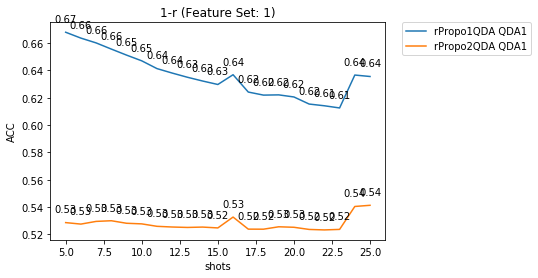

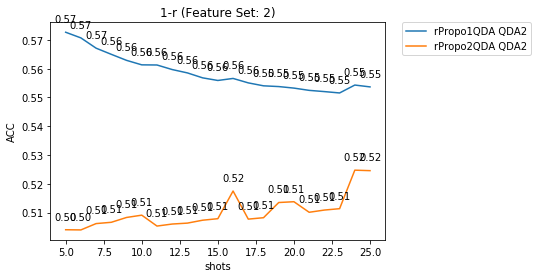

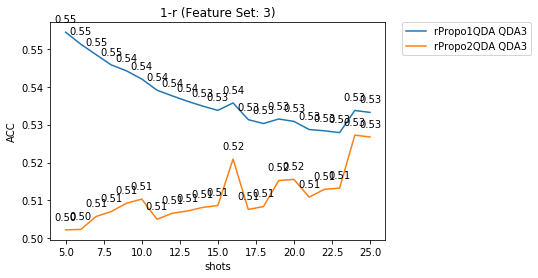

In [23]:
def graph1_R(FeatureSet):
    
    shot=np.arange(5,26)
    
    
#     Model='rPropo1LDA'    
#     Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']=='LDA'])
#     plt.plot(shot,Y,label=Model+' '+'LDA'+str(FeatureSet))

#     # zip joins x and y coordinates in pairs
#     for x,y in zip(shot,Y):

#         label = "{:.2f}".format(y)

#         plt.annotate(label, # this is the text
#                      (x,y), # this is the point to label
#                      textcoords="offset points", # how to position the text
#                      xytext=(0,10), # distance from text to points (x,y)
#                      ha='center') # horizontal alignment can be left, right or center
        
#     Model='rPropo2LDA'    
#     Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']=='LDA'])
#     plt.plot(shot,Y,label=Model+' '+'LDA'+str(FeatureSet))

#     # zip joins x and y coordinates in pairs
#     for x,y in zip(shot,Y):

#         label = "{:.2f}".format(y)

#         plt.annotate(label, # this is the text
#                      (x,y), # this is the point to label
#                      textcoords="offset points", # how to position the text
#                      xytext=(0,10), # distance from text to points (x,y)
#                      ha='center') # horizontal alignment can be left, right or center
        
        
    Model='rPropo1QDA'    
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']=='LDA'])
    plt.plot(shot,Y,label=Model+' '+'QDA'+str(FeatureSet))

    # zip joins x and y coordinates in pairs
    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
        
    Model='rPropo2QDA'    
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']=='LDA'])
    plt.plot(shot,Y,label=Model+' '+'QDA'+str(FeatureSet))

    # zip joins x and y coordinates in pairs
    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
    



    plt.xlabel('shots')
    plt.ylabel('ACC')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title('1-r (Feature Set: ' + str(FeatureSet) + ')')
    plt.show()

graph1_R(1)
graph1_R(2)
graph1_R(3)

In [24]:
def graphIndivsPropoQDA(FeatureSet):
    shot=np.arange(5,26)
    
     #PROPOSED MODELS
    Classifier='QDA'
    Feature=3
    
    Model='Prop1QDA'
    Y=np.array(results[Model].loc[results['Feature Set']==Feature].loc[results['Classifier']==Classifier])
    plt.plot(shot,Y,label=Model+Classifier+str(Feature))

    # zip joins x and y coordinates in pairs
    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
        
        
    Model='Prop2QDA'
    Y=np.array(results[Model].loc[results['Feature Set']==Feature].loc[results['Classifier']==Classifier])
    plt.plot(shot,Y,label=Model+Classifier+str(Feature))

    # zip joins x and y coordinates in pairs
    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
    
    
    
    #INDIVIDUALS
    
    Model='IndPca'
    
    Classifier='LDA'
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
    plt.plot(shot,Y,label=Model+Classifier+str(FeatureSet))

    # zip joins x and y coordinates in pairs
    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
        
    Classifier='QDA'
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
    plt.plot(shot,Y,label=Model+Classifier+str(FeatureSet))

    # zip joins x and y coordinates in pairs
    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
    
    Classifier='KNN'
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
    plt.plot(shot,Y,label=Model+Classifier+str(FeatureSet))

    # zip joins x and y coordinates in pairs
    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
        
        
    Classifier='SVM'
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
    plt.plot(shot,Y,label=Model+Classifier+str(FeatureSet))

    # zip joins x and y coordinates in pairs
    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
        
    
    
    
   
    
   
        
        
    
    plt.xlabel('shots')
    plt.ylabel('ACC')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title('Best model (' + Model + ')')
    plt.show()





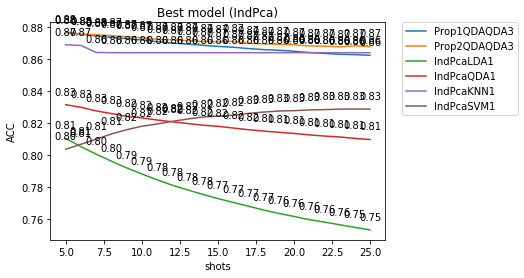

In [25]:
graphIndivsPropoQDA(1)

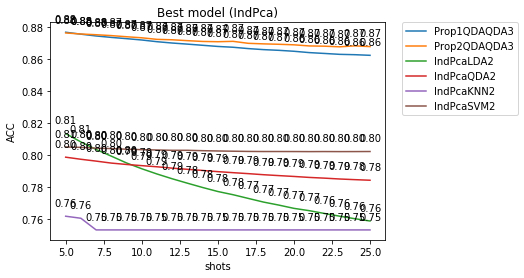

In [26]:
graphIndivsPropoQDA(2)

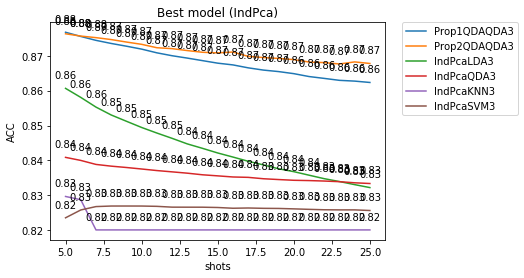

In [27]:
graphIndivsPropoQDA(3)

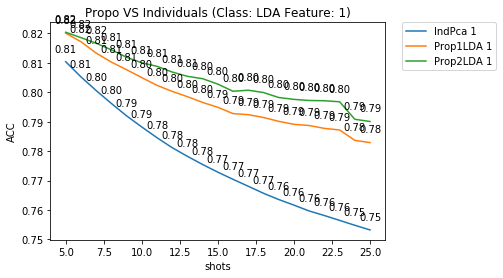

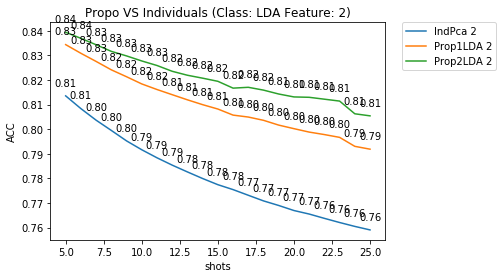

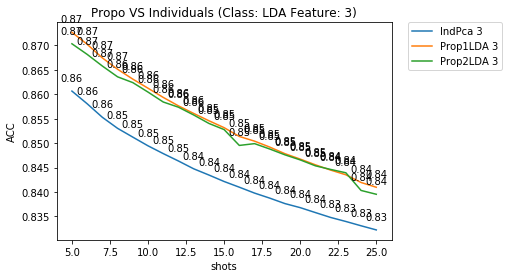

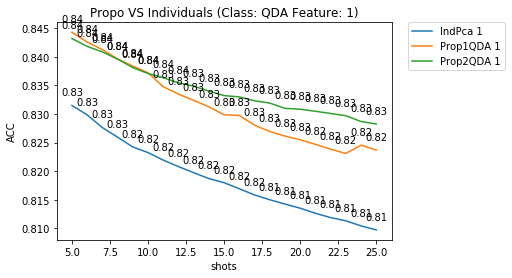

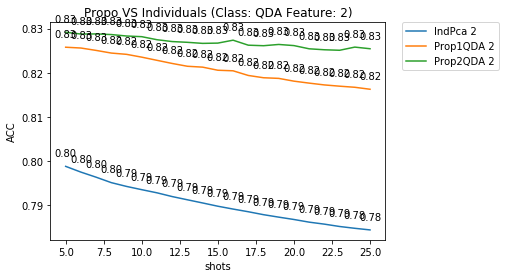

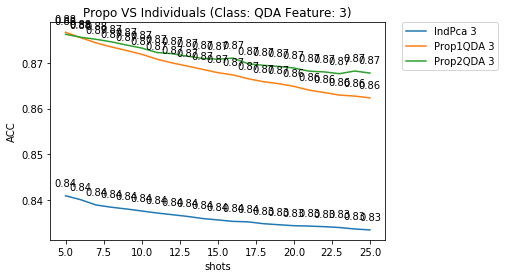

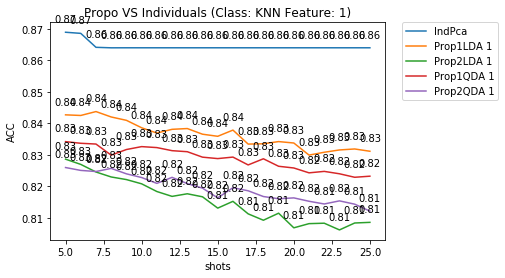

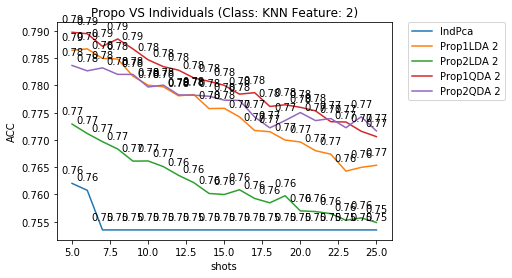

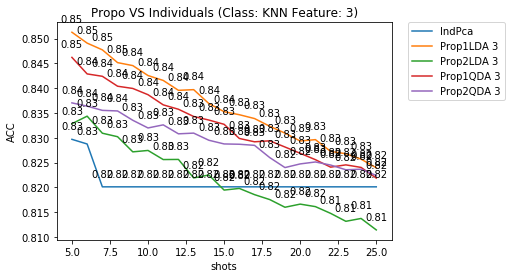

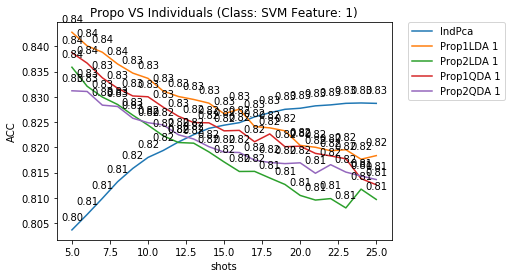

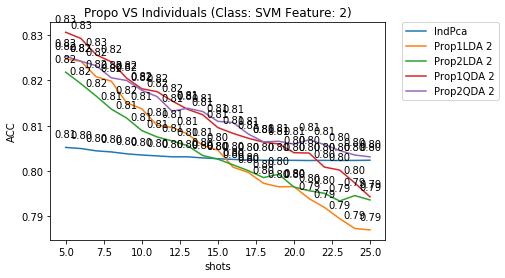

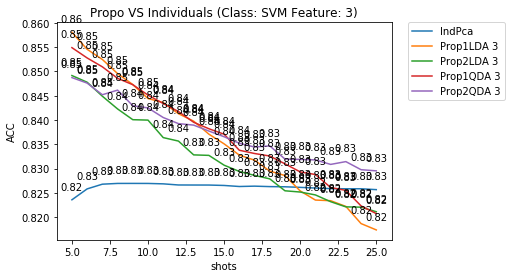

In [20]:

def graphIndividualVSPropo(Classifier,FeatureSet,typeModel):
    
    shot=np.arange(5,26)
    
    if Classifier =='KNN' or Classifier =='SVM':
        
        Model='IndPca'
        Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
        plt.plot(shot,Y,label=Model)

        # zip joins x and y coordinates in pairs
        for x,y in zip(shot,Y):

            label = "{:.2f}".format(y)

            plt.annotate(label, # this is the text
                         (x,y), # this is the point to label
                         textcoords="offset points", # how to position the text
                         xytext=(0,10), # distance from text to points (x,y)
                         ha='center') # horizontal alignment can be left, right or center
            
#         Model='liu'
#         Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
#         plt.plot(shot,Y,label=Model+' '+Classifier+str(FeatureSet))

#         # zip joins x and y coordinates in pairs
#         for x,y in zip(shot,Y):

#             label = "{:.2f}".format(y)

#             plt.annotate(label, # this is the text
#                          (x,y), # this is the point to label
#                          textcoords="offset points", # how to position the text
#                          xytext=(0,10), # distance from text to points (x,y)
#                          ha='center') # horizontal alignment can be left, right or center

#         Model='liuPca'
#         Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
#         plt.plot(shot,Y,label=Model+' '+Classifier+str(FeatureSet))

#         # zip joins x and y coordinates in pairs
#         for x,y in zip(shot,Y):

#             label = "{:.2f}".format(y)

#             plt.annotate(label, # this is the text
#                          (x,y), # this is the point to label
#                          textcoords="offset points", # how to position the text
#                          xytext=(0,10), # distance from text to points (x,y)
#                          ha='center') # horizontal alignment can be left, right or center

        
        for i in range(2):
            if i==0:
                typeModel='LDA'
            elif i==1:
                typeModel='QDA'
                
        
        

            Model='Prop1'+typeModel
            Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
            plt.plot(shot,Y,label=Model+' '+str(FeatureSet))

            # zip joins x and y coordinates in pairs
            for x,y in zip(shot,Y):

                label = "{:.2f}".format(y)

                plt.annotate(label, # this is the text
                             (x,y), # this is the point to label
                             textcoords="offset points", # how to position the text
                             xytext=(0,10), # distance from text to points (x,y)
                             ha='center') # horizontal alignment can be left, right or center


            Model='Prop2'+typeModel
            Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
            plt.plot(shot,Y,label=Model+' '+str(FeatureSet))

            # zip joins x and y coordinates in pairs
            for x,y in zip(shot,Y):

                label = "{:.2f}".format(y)

                plt.annotate(label, # this is the text
                             (x,y), # this is the point to label
                             textcoords="offset points", # how to position the text
                             xytext=(0,10), # distance from text to points (x,y)
                             ha='center') # horizontal alignment can be left, right or center

        
    else:
        
        
        Model='IndPca'
        Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
        plt.plot(shot,Y,label=Model+' '+str(FeatureSet))

        # zip joins x and y coordinates in pairs
        for x,y in zip(shot,Y):

            label = "{:.2f}".format(y)

            plt.annotate(label, # this is the text
                         (x,y), # this is the point to label
                         textcoords="offset points", # how to position the text
                         xytext=(0,10), # distance from text to points (x,y)
                         ha='center') # horizontal alignment can be left, right or center

        

#         Model='liu'
#         Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
#         plt.plot(shot,Y,label=Model+' '+Classifier+str(FeatureSet))

#         # zip joins x and y coordinates in pairs
#         for x,y in zip(shot,Y):

#             label = "{:.2f}".format(y)

#             plt.annotate(label, # this is the text
#                          (x,y), # this is the point to label
#                          textcoords="offset points", # how to position the text
#                          xytext=(0,10), # distance from text to points (x,y)
#                          ha='center') # horizontal alignment can be left, right or center

#         Model='liuPca'
#         Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
#         plt.plot(shot,Y,label=Model+' '+Classifier+str(FeatureSet))

#         # zip joins x and y coordinates in pairs
#         for x,y in zip(shot,Y):

#             label = "{:.2f}".format(y)

#             plt.annotate(label, # this is the text
#                          (x,y), # this is the point to label
#                          textcoords="offset points", # how to position the text
#                          xytext=(0,10), # distance from text to points (x,y)
#                          ha='center') # horizontal alignment can be left, right or center
            
        
        Model='Prop1'+typeModel
        Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
        plt.plot(shot,Y,label=Model+' '+str(FeatureSet))

        # zip joins x and y coordinates in pairs
        for x,y in zip(shot,Y):

            label = "{:.2f}".format(y)

            plt.annotate(label, # this is the text
                         (x,y), # this is the point to label
                         textcoords="offset points", # how to position the text
                         xytext=(0,10), # distance from text to points (x,y)
                         ha='center') # horizontal alignment can be left, right or center


        Model='Prop2'+typeModel
        Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
        plt.plot(shot,Y,label=Model+' '+str(FeatureSet))

        # zip joins x and y coordinates in pairs
        for x,y in zip(shot,Y):

            label = "{:.2f}".format(y)

            plt.annotate(label, # this is the text
                         (x,y), # this is the point to label
                         textcoords="offset points", # how to position the text
                         xytext=(0,10), # distance from text to points (x,y)
                         ha='center') # horizontal alignment can be left, right or center



    plt.xlabel('shots')
    plt.ylabel('ACC')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title('Propo VS Individuals (Class: ' + Classifier + ' Feature: ' + str(FeatureSet) + ')')
    plt.show()

Classifier='LDA'
for FeatureSet in range(1,4):
    graphIndividualVSPropo(Classifier,FeatureSet,'LDA')

Classifier='QDA'
for FeatureSet in range(1,4):
    graphIndividualVSPropo(Classifier,FeatureSet,'QDA')

    
Classifier='KNN'
for FeatureSet in range(1,4):
    graphIndividualVSPropo(Classifier,FeatureSet,'')

Classifier='SVM'
for FeatureSet in range(1,4):
    graphIndividualVSPropo(Classifier,FeatureSet,'')




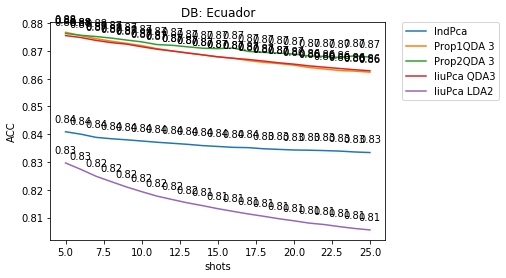

In [22]:
shot=np.arange(5,26)



def graphBest():


    FeatureSet=3
    Classifier='QDA'
    typeModel='QDA'
    
    Model='IndPca'
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
    plt.plot(shot,Y,label=Model)

    # zip joins x and y coordinates in pairs
    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
    
    Model='Prop1'+typeModel
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
    plt.plot(shot,Y,label=Model+' '+str(FeatureSet))

    # zip joins x and y coordinates in pairs
    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center


    Model='Prop2'+typeModel
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
    plt.plot(shot,Y,label=Model+' '+str(FeatureSet))

    # zip joins x and y coordinates in pairs
    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
    
    Model='liuPca'
#     Classifier='LDA'
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
    plt.plot(shot,Y,label=Model+' '+Classifier+str(FeatureSet))

    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
        
    
    Model='liuPca'
    FeatureSetLiu=2
    ClassifierLiu='LDA'
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSetLiu].loc[results['Classifier']==ClassifierLiu])
    plt.plot(shot,Y,label=Model+' '+ClassifierLiu+str(FeatureSetLiu))

    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
    
    
#     Model='Cote'
    
#     Y=np.array([0.9469,0.9663,0.9782,0.9831])
#     plt.plot(shot,Y,label=Model+'DeepNeural')

#     for x,y in zip(shot,Y):

#         label = "{:.2f}".format(y)

#         plt.annotate(label, # this is the text
#                      (x,y), # this is the point to label
#                      textcoords="offset points", # how to position the text
#                      xytext=(0,10), # distance from text to points (x,y)
#                      ha='center') # horizontal alignment can be left, right or center

    



#     Model='propo11BB'
#     Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
#     plt.plot(shot,Y,label=Model)

#     for x,y in zip(shot,Y):

#         label = "{:.2f}".format(y)

#         plt.annotate(label, # this is the text
#                      (x,y), # this is the point to label
#                      textcoords="offset points", # how to position the text
#                      xytext=(0,10), # distance from text to points (x,y)
#                      ha='center') # horizontal alignment can be left, right or center


#     Model='propoNew'
#     Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
#     plt.plot(shot,Y,label=Model)

#     for x,y in zip(shot,Y):

#         label = "{:.2f}".format(y)

#         plt.annotate(label, # this is the text
#                      (x,y), # this is the point to label
#                      textcoords="offset points", # how to position the text
#                      xytext=(0,10), # distance from text to points (x,y)
#                      ha='center') # horizontal alignment can be left, right or center
    
    
    
#     Model='propoNew2'
#     Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
#     plt.plot(shot,Y,label=Model)

#     for x,y in zip(shot,Y):

#         label = "{:.2f}".format(y)

#         plt.annotate(label, # this is the text
#                      (x,y), # this is the point to label
#                      textcoords="offset points", # how to position the text
#                      xytext=(0,10), # distance from text to points (x,y)
#                      ha='center') # horizontal alignment can be left, right or center


#     plt.xticks(np.arange(1,5,1))
#     plt.yticks(np.arange(0.6,1,0.5))

    plt.xlabel('shots')
    plt.ylabel('ACC')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title('DB: Ecuador')
    plt.show()

graphBest()

In [45]:
def graphBestModel(modelName,typeModel):
    shot=np.arange(1,5)
    Model=modelName + typeModel
    if typeModel == 'LDA' or typeModel == '':
        Classifier='LDA'
        for FeatureSet in range(1,4):
            Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
            plt.plot(shot,Y,label=Model+Classifier+str(FeatureSet))

            # zip joins x and y coordinates in pairs
            for x,y in zip(shot,Y):

                label = "{:.2f}".format(y)

                plt.annotate(label, # this is the text
                             (x,y), # this is the point to label
                             textcoords="offset points", # how to position the text
                             xytext=(0,10), # distance from text to points (x,y)
                             ha='center') # horizontal alignment can be left, right or center
    
    if typeModel == 'QDA' or typeModel == '':
        Classifier='QDA'
        for FeatureSet in range(1,4):
            Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
            plt.plot(shot,Y,label=Model+Classifier+str(FeatureSet))

            # zip joins x and y coordinates in pairs
            for x,y in zip(shot,Y):

                label = "{:.2f}".format(y)

                plt.annotate(label, # this is the text
                             (x,y), # this is the point to label
                             textcoords="offset points", # how to position the text
                             xytext=(0,10), # distance from text to points (x,y)
                             ha='center') # horizontal alignment can be left, right or center
    
    if typeModel == '':
        Classifier='KNN'
        for FeatureSet in range(1,4):
            Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
            plt.plot(shot,Y,label=Model+Classifier+str(FeatureSet))

            # zip joins x and y coordinates in pairs
            for x,y in zip(shot,Y):

                label = "{:.2f}".format(y)

                plt.annotate(label, # this is the text
                             (x,y), # this is the point to label
                             textcoords="offset points", # how to position the text
                             xytext=(0,10), # distance from text to points (x,y)
                             ha='center') # horizontal alignment can be left, right or center
        Classifier='SVM'
        for FeatureSet in range(1,4):
            Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
            plt.plot(shot,Y,label=Model+Classifier+str(FeatureSet))

            # zip joins x and y coordinates in pairs
            for x,y in zip(shot,Y):

                label = "{:.2f}".format(y)

                plt.annotate(label, # this is the text
                             (x,y), # this is the point to label
                             textcoords="offset points", # how to position the text
                             xytext=(0,10), # distance from text to points (x,y)
                             ha='center') # horizontal alignment can be left, right or center

    
    plt.xlabel('shots')
    plt.ylabel('ACC')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title('Best model (' + Model + ')')
    plt.show()





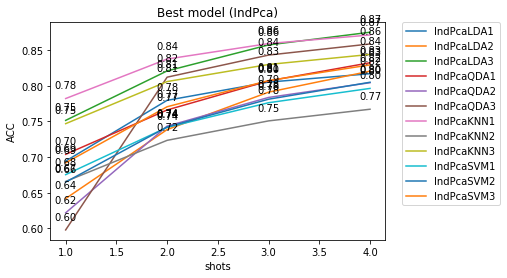

In [24]:
graphBestModel('IndPca','')

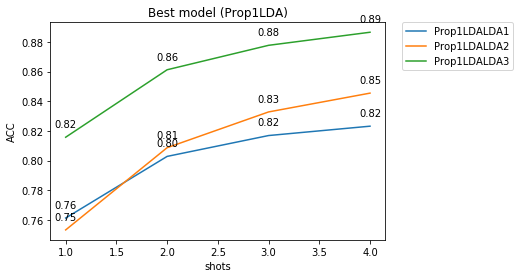

In [25]:
graphBestModel('Prop1','LDA')

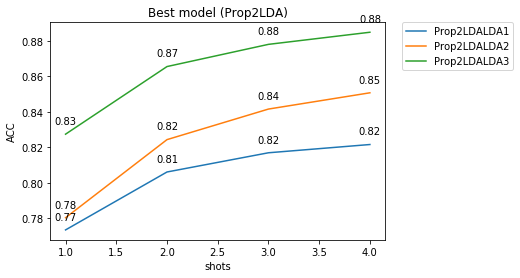

In [26]:
graphBestModel('Prop2','LDA')

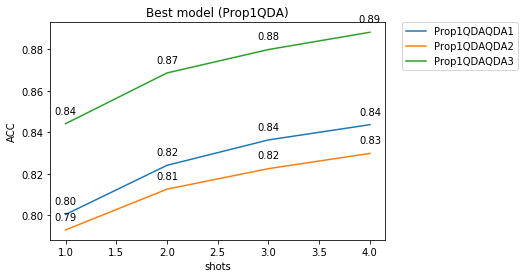

In [27]:
graphBestModel('Prop1','QDA')

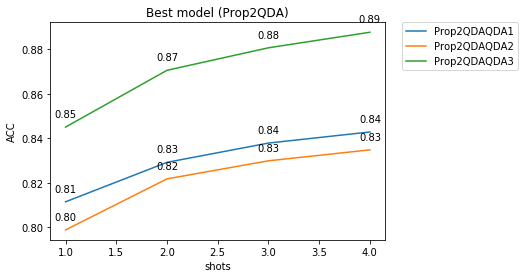

In [28]:
graphBestModel('Prop2','QDA')

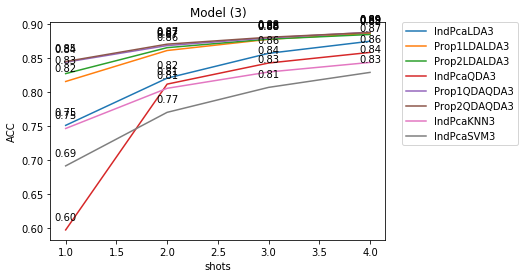

In [29]:
def graphModelFeatureSet(FeatureSet):
    shot=np.arange(1,5)
    
    Classifier='LDA'
    
    Model='IndPca'
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
    plt.plot(shot,Y,label=Model+Classifier+str(FeatureSet))

    # zip joins x and y coordinates in pairs
    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
    
    Model='Prop1LDA'
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
    plt.plot(shot,Y,label=Model+Classifier+str(FeatureSet))

    # zip joins x and y coordinates in pairs
    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
    Model='Prop2LDA'
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
    plt.plot(shot,Y,label=Model+Classifier+str(FeatureSet))

    # zip joins x and y coordinates in pairs
    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
        
    Classifier='QDA'
    
    Model='IndPca'
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
    plt.plot(shot,Y,label=Model+Classifier+str(FeatureSet))

    # zip joins x and y coordinates in pairs
    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
    
    Model='Prop1QDA'
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
    plt.plot(shot,Y,label=Model+Classifier+str(FeatureSet))

    # zip joins x and y coordinates in pairs
    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center 
    Model='Prop2QDA'
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
    plt.plot(shot,Y,label=Model+Classifier+str(FeatureSet))

    # zip joins x and y coordinates in pairs
    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center 
        
    
    Classifier='KNN'
    
    Model='IndPca'
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
    plt.plot(shot,Y,label=Model+Classifier+str(FeatureSet))

    # zip joins x and y coordinates in pairs
    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
    
    Classifier='SVM'
    
    Model='IndPca'
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
    plt.plot(shot,Y,label=Model+Classifier+str(FeatureSet))

    # zip joins x and y coordinates in pairs
    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
    
    

    
    plt.xlabel('shots')
    plt.ylabel('ACC')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title('Model (' + str(FeatureSet) + ')')
    plt.show()


graphModelFeatureSet(3)


In [23]:
shot=np.arange(1,5)



def graphIndividual(Model):

#     Model='Individual'
    Classifier='LDA'
    for FeatureSet in range(1,4):
        Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
        plt.plot(shot,Y,label=Model+Classifier+str(FeatureSet))

        # zip joins x and y coordinates in pairs
        for x,y in zip(shot,Y):

            label = "{:.2f}".format(y)

            plt.annotate(label, # this is the text
                         (x,y), # this is the point to label
                         textcoords="offset points", # how to position the text
                         xytext=(0,10), # distance from text to points (x,y)
                         ha='center') # horizontal alignment can be left, right or center
    Classifier='QDA'
    for FeatureSet in range(1,4):
        Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
        plt.plot(shot,Y,label=Model+Classifier+str(FeatureSet))

        # zip joins x and y coordinates in pairs
        for x,y in zip(shot,Y):

            label = "{:.2f}".format(y)

            plt.annotate(label, # this is the text
                         (x,y), # this is the point to label
                         textcoords="offset points", # how to position the text
                         xytext=(0,10), # distance from text to points (x,y)
                         ha='center') # horizontal alignment can be left, right or center
    
    Classifier='KNN'
    for FeatureSet in range(1,4):
        Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
        plt.plot(shot,Y,label=Model+Classifier+str(FeatureSet))

        # zip joins x and y coordinates in pairs
        for x,y in zip(shot,Y):

            label = "{:.2f}".format(y)

            plt.annotate(label, # this is the text
                         (x,y), # this is the point to label
                         textcoords="offset points", # how to position the text
                         xytext=(0,10), # distance from text to points (x,y)
                         ha='center') # horizontal alignment can be left, right or center
    Classifier='SVM'
    for FeatureSet in range(1,4):
        Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
        plt.plot(shot,Y,label=Model+Classifier+str(FeatureSet))

        # zip joins x and y coordinates in pairs
        for x,y in zip(shot,Y):

            label = "{:.2f}".format(y)

            plt.annotate(label, # this is the text
                         (x,y), # this is the point to label
                         textcoords="offset points", # how to position the text
                         xytext=(0,10), # distance from text to points (x,y)
                         ha='center') # horizontal alignment can be left, right or center

    
    plt.xlabel('shots')
    plt.ylabel('ACC')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()





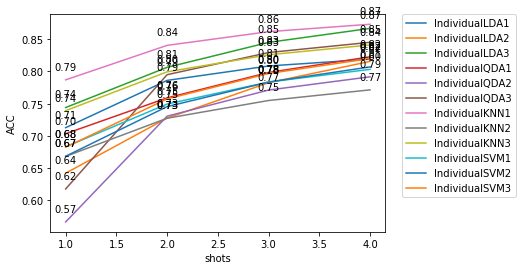

In [24]:
graphIndividual('Individual')

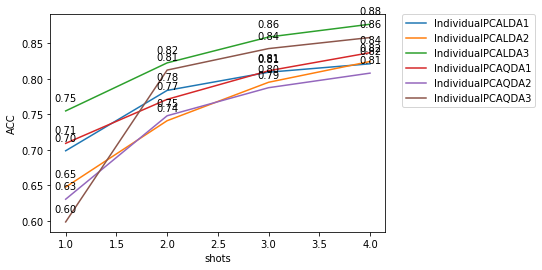

In [21]:
graphIndividual('IndividualPCA')

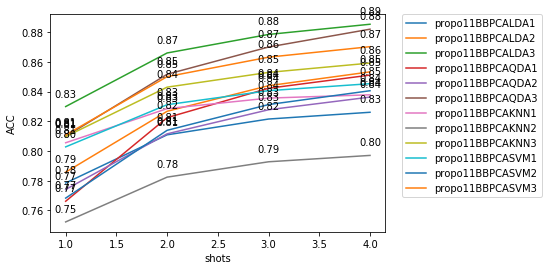

In [26]:
graphIndividual('propo11BBPCA')

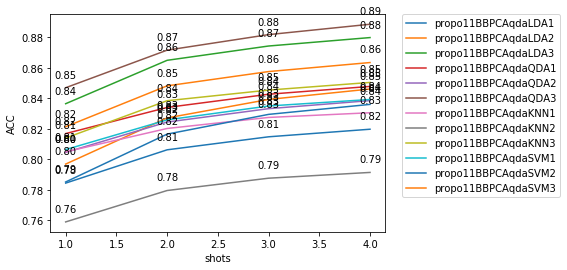

In [28]:
graphIndividual('propo11BBPCAqda')

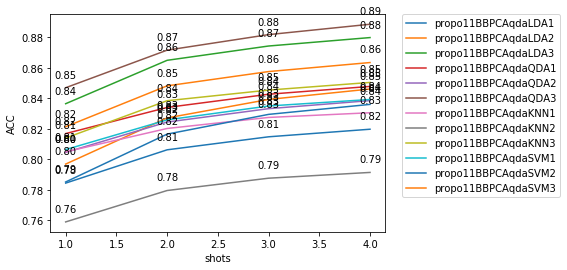

In [13]:
graphIndividual('propo11BBPCAqda')

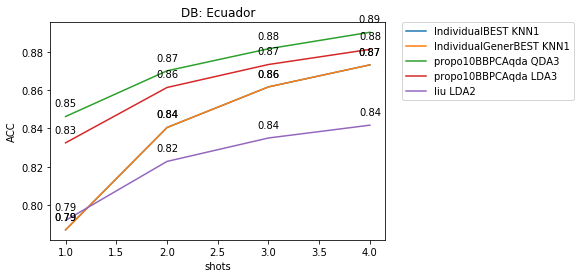

In [14]:
shot=np.arange(1,5)



def graphBest():

#     Model='Individual'
#     Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
#     plt.plot(shot,Y,label=Model)

#     # zip joins x and y coordinates in pairs
#     for x,y in zip(shot,Y):

#         label = "{:.2f}".format(y)

#         plt.annotate(label, # this is the text
#                      (x,y), # this is the point to label
#                      textcoords="offset points", # how to position the text
#                      xytext=(0,10), # distance from text to points (x,y)
#                      ha='center') # horizontal alignment can be left, right or center
        
    Model='Individual'
    FeatureSetIndi=1
    ClassifierIndi='KNN'
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSetIndi].loc[results['Classifier']==ClassifierIndi])
    plt.plot(shot,Y,label=Model+'BEST'+' '+ClassifierIndi+str(FeatureSetIndi))

    # zip joins x and y coordinates in pairs
    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
        
    Model='IndividualGener'
    FeatureSetIndi=1
    ClassifierIndi='KNN'
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSetIndi].loc[results['Classifier']==ClassifierIndi])
    plt.plot(shot,Y,label=Model+'BEST'+' '+ClassifierIndi+str(FeatureSetIndi))

    # zip joins x and y coordinates in pairs
    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
        
        
    Model='propo10BBPCAqda'
    FeatureSet10BB=3
    Classifier10BB='QDA'
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet10BB].loc[results['Classifier']==Classifier10BB])
    plt.plot(shot,Y,label=Model+' '+Classifier10BB+str(FeatureSet10BB))

    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
    
    Model='propo10BBPCAqda'
    FeatureSet10BB=3
    Classifier10BB='LDA'
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet10BB].loc[results['Classifier']==Classifier10BB])
    plt.plot(shot,Y,label=Model+' '+Classifier10BB+str(FeatureSet10BB))

    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center


#     Model='liu'   
#     Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
#     plt.plot(shot,Y,label=Model)

#     for x,y in zip(shot,Y):

#         label = "{:.2f}".format(y)

#         plt.annotate(label, # this is the text
#                      (x,y), # this is the point to label
#                      textcoords="offset points", # how to position the text
#                      xytext=(0,10), # distance from text to points (x,y)
#                      ha='center') # horizontal alignment can be left, right or center
    
    Model='liu'
    FeatureSetLiu=2
    ClassifierLiu='LDA'
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSetLiu].loc[results['Classifier']==ClassifierLiu])
    plt.plot(shot,Y,label=Model+' '+ClassifierLiu+str(FeatureSetLiu))

    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
    
    
#     Model='Cote'
    
#     Y=np.array([0.9469,0.9663,0.9782,0.9831])
#     plt.plot(shot,Y,label=Model+'DeepNeural')

#     for x,y in zip(shot,Y):

#         label = "{:.2f}".format(y)

#         plt.annotate(label, # this is the text
#                      (x,y), # this is the point to label
#                      textcoords="offset points", # how to position the text
#                      xytext=(0,10), # distance from text to points (x,y)
#                      ha='center') # horizontal alignment can be left, right or center

    



#     Model='propo11BB'
#     Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
#     plt.plot(shot,Y,label=Model)

#     for x,y in zip(shot,Y):

#         label = "{:.2f}".format(y)

#         plt.annotate(label, # this is the text
#                      (x,y), # this is the point to label
#                      textcoords="offset points", # how to position the text
#                      xytext=(0,10), # distance from text to points (x,y)
#                      ha='center') # horizontal alignment can be left, right or center


#     Model='propoNew'
#     Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
#     plt.plot(shot,Y,label=Model)

#     for x,y in zip(shot,Y):

#         label = "{:.2f}".format(y)

#         plt.annotate(label, # this is the text
#                      (x,y), # this is the point to label
#                      textcoords="offset points", # how to position the text
#                      xytext=(0,10), # distance from text to points (x,y)
#                      ha='center') # horizontal alignment can be left, right or center
    
    
    
#     Model='propoNew2'
#     Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
#     plt.plot(shot,Y,label=Model)

#     for x,y in zip(shot,Y):

#         label = "{:.2f}".format(y)

#         plt.annotate(label, # this is the text
#                      (x,y), # this is the point to label
#                      textcoords="offset points", # how to position the text
#                      xytext=(0,10), # distance from text to points (x,y)
#                      ha='center') # horizontal alignment can be left, right or center


#     plt.xticks(np.arange(1,5,1))
#     plt.yticks(np.arange(0.6,1,0.5))

    plt.xlabel('shots')
    plt.ylabel('ACC')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title('DB: Ecuador')
    plt.show()

graphBest()

In [7]:
results= pd.DataFrame(columns=['Data set', 'Feature Set', '# shots','Classifier'
                               ,'Individual','IndividualGener','C1','liu','propo1','propo2','propo3','propo4','propo5','propo55'
                               ,'propo6','propo7','propo8','propo88','propo9','propo99'])

                                         

idx=0
for i in range(1,5):
    for j in range(1,4):
        
        for k in range(0,4):
            if k==0:
                classifier='LDA'
                indi='AccLDAInd'
                indiGene='AccLDAInd'
                liu='AccLDALiu'
                propoNew10BB='AccLDA10BB'
                propoNew11BB='AccLDA11BB'
                
            elif k==1:
                classifier='QDA'
                indi='AccQDAInd'
                indiGene='AccQDAInd'
                liu='AccQDALiu'                
                propoNew10BB='AccQDA10BB'
                propoNew11BB='AccQDA11BB'
            elif k==2:
                classifier='KNN'
                indi='AccKNNInd'
                indiGene='AccKNNIndGen'
                liu='AccKNNLiu'
                propoNew10BB='AccKNN10BB'
                propoNew11BB='AccKNN11BB'
            else:
                classifier='SVM'
                indi='AccSVMInd'
                indiGene='AccSVMGIndGen'
                liu='AccSVMLiu'
                propoNew10BB='AccSVM10BB'
                propoNew11BB='AccSVM11BB'

                
                    
                    
            results.at[idx,'Classifier']=classifier
            results.at[idx,'indi']=resultsTest4[indi].loc[(resultsTest4['# shots'] == i)&(resultsTest4['Feature Set'] == j)].mean(axis=0)
            results.at[idx,'indiGene']=resultsTest4[indiGene].loc[(resultsTest4['# shots'] == i)&(resultsTest4['Feature Set'] == j)].mean(axis=0)
            results.at[idx,'liu']=resultsTest4[liu].loc[(resultsTest4['# shots'] == i)&(resultsTest4['Feature Set'] == j)].mean(axis=0)
            results.at[idx,'propoNew10BB']=resultsTest4[propoNew10BB].loc[(resultsTest4['# shots'] == i)&(resultsTest4['Feature Set'] == j)].mean(axis=0)
            results.at[idx,'propoNew11BB']=resultsTest4[propoNew11BB].loc[(resultsTest4['# shots'] == i)&(resultsTest4['Feature Set'] == j)].mean(axis=0)
            
            
            
            
            
            
            #             results.at[idx,'Std Individual']=resultsFeatureSets[indi].loc[(resultsFeatureSets['# shots'] == i)&(resultsFeatureSets['Feature Set'] == j)].std(axis=0)
#             results.at[idx,'Std General']=resultsFeatureSets[general].loc[(resultsFeatureSets['# shots'] == i)&(resultsFeatureSets['Feature Set'] == j)].std(axis=0)
#             results.at[idx,'Std Proposed']=resultsFeatureSets[proposed].loc[(resultsFeatureSets['# shots'] == i)&(resultsFeatureSets['Feature Set'] == j)].std(axis=0)
            
#             results.at[idx,'Wilcoxon']=stats.wilcoxon(resultsFeatureSets[indi].loc[(resultsFeatureSets['# shots'] == i)&(resultsFeatureSets['Feature Set'] == j)],resultsFeatureSets[proposed].loc[(resultsFeatureSets['# shots'] == i)&(resultsFeatureSets['Feature Set'] == j)])
            results.at[idx,'Data set']='CoteAllard'
            results.at[idx,'Feature Set']=j
            results.at[idx,'# shots']=i
            idx+=1
        
        

In [20]:
results.to_csv('Results_Seg_CoteAllard_Table.csv')

In [8]:
results[['Data set','Feature Set','# shots','Classifier','indi','indiGene','liu','propoNew10BB','propoNew11BB']]


,Data set,Feature Set,# shots,Classifier,indi,indiGene,liu,propoNew10BB,propoNew11BB
0,CoteAllard,1,1,LDA,0.698814,0.698814,0.781841,0.763429,0.760406
1,CoteAllard,1,1,QDA,0.704857,0.704857,0.810616,0.717418,0.615212
2,CoteAllard,1,1,KNN,0.792544,0.806247,0.796451,0.798799,0.787788
3,CoteAllard,1,1,SVM,0.680446,0.787550,0.802989,0.789522,0.782319
4,CoteAllard,2,1,LDA,0.640533,0.640533,0.791724,0.744703,0.746269
5,CoteAllard,2,1,QDA,0.577687,0.577687,0.800623,0.618235,0.560088
6,CoteAllard,2,1,KNN,0.720184,0.743279,0.756102,0.747708,0.736525
7,CoteAllard,2,1,SVM,0.668022,0.682291,0.773053,0.702922,0.676693
8,CoteAllard,3,1,LDA,0.743322,0.743322,0.827093,0.798635,0.795407
9,CoteAllard,3,1,QDA,0.633172,0.633172,0.835877,0.671996,0.603646


In [43]:
y=np.array(results['Individual'].loc[results['Feature Set']==1].loc[results['Classifier']=='LDA'])

0.8975911272635764

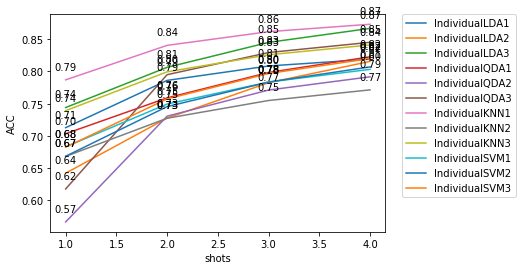

In [15]:
shot=np.arange(1,5)



def graphIndividual():

    Model='Individual'
    Classifier='LDA'
    for FeatureSet in range(1,4):
        Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
        plt.plot(shot,Y,label=Model+Classifier+str(FeatureSet))

        # zip joins x and y coordinates in pairs
        for x,y in zip(shot,Y):

            label = "{:.2f}".format(y)

            plt.annotate(label, # this is the text
                         (x,y), # this is the point to label
                         textcoords="offset points", # how to position the text
                         xytext=(0,10), # distance from text to points (x,y)
                         ha='center') # horizontal alignment can be left, right or center
    Classifier='QDA'
    for FeatureSet in range(1,4):
        Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
        plt.plot(shot,Y,label=Model+Classifier+str(FeatureSet))

        # zip joins x and y coordinates in pairs
        for x,y in zip(shot,Y):

            label = "{:.2f}".format(y)

            plt.annotate(label, # this is the text
                         (x,y), # this is the point to label
                         textcoords="offset points", # how to position the text
                         xytext=(0,10), # distance from text to points (x,y)
                         ha='center') # horizontal alignment can be left, right or center
    
    Classifier='KNN'
    for FeatureSet in range(1,4):
        Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
        plt.plot(shot,Y,label=Model+Classifier+str(FeatureSet))

        # zip joins x and y coordinates in pairs
        for x,y in zip(shot,Y):

            label = "{:.2f}".format(y)

            plt.annotate(label, # this is the text
                         (x,y), # this is the point to label
                         textcoords="offset points", # how to position the text
                         xytext=(0,10), # distance from text to points (x,y)
                         ha='center') # horizontal alignment can be left, right or center
    Classifier='SVM'
    for FeatureSet in range(1,4):
        Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
        plt.plot(shot,Y,label=Model+Classifier+str(FeatureSet))

        # zip joins x and y coordinates in pairs
        for x,y in zip(shot,Y):

            label = "{:.2f}".format(y)

            plt.annotate(label, # this is the text
                         (x,y), # this is the point to label
                         textcoords="offset points", # how to position the text
                         xytext=(0,10), # distance from text to points (x,y)
                         ha='center') # horizontal alignment can be left, right or center

    
    plt.xlabel('shots')
    plt.ylabel('ACC')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()


graphIndividual()


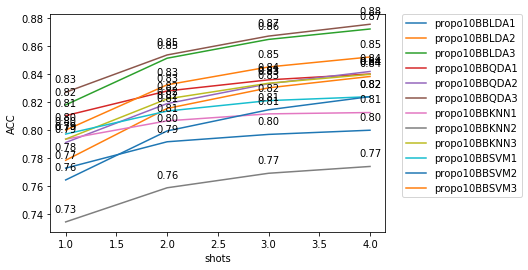

In [19]:
shot=np.arange(1,5)



def graphIndividual():

    Model='propo10BB'
    Classifier='LDA'
    for FeatureSet in range(1,4):
        Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
        plt.plot(shot,Y,label=Model+Classifier+str(FeatureSet))

        # zip joins x and y coordinates in pairs
        for x,y in zip(shot,Y):

            label = "{:.2f}".format(y)

            plt.annotate(label, # this is the text
                         (x,y), # this is the point to label
                         textcoords="offset points", # how to position the text
                         xytext=(0,10), # distance from text to points (x,y)
                         ha='center') # horizontal alignment can be left, right or center
    Classifier='QDA'
    for FeatureSet in range(1,4):
        Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
        plt.plot(shot,Y,label=Model+Classifier+str(FeatureSet))

        # zip joins x and y coordinates in pairs
        for x,y in zip(shot,Y):

            label = "{:.2f}".format(y)

            plt.annotate(label, # this is the text
                         (x,y), # this is the point to label
                         textcoords="offset points", # how to position the text
                         xytext=(0,10), # distance from text to points (x,y)
                         ha='center') # horizontal alignment can be left, right or center
    
    Classifier='KNN'
    for FeatureSet in range(1,4):
        Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
        plt.plot(shot,Y,label=Model+Classifier+str(FeatureSet))

        # zip joins x and y coordinates in pairs
        for x,y in zip(shot,Y):

            label = "{:.2f}".format(y)

            plt.annotate(label, # this is the text
                         (x,y), # this is the point to label
                         textcoords="offset points", # how to position the text
                         xytext=(0,10), # distance from text to points (x,y)
                         ha='center') # horizontal alignment can be left, right or center
    Classifier='SVM'
    for FeatureSet in range(1,4):
        Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
        plt.plot(shot,Y,label=Model+Classifier+str(FeatureSet))

        # zip joins x and y coordinates in pairs
        for x,y in zip(shot,Y):

            label = "{:.2f}".format(y)

            plt.annotate(label, # this is the text
                         (x,y), # this is the point to label
                         textcoords="offset points", # how to position the text
                         xytext=(0,10), # distance from text to points (x,y)
                         ha='center') # horizontal alignment can be left, right or center

    
    plt.xlabel('shots')
    plt.ylabel('ACC')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()


graphIndividual()


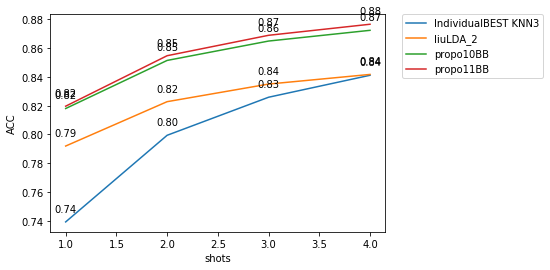

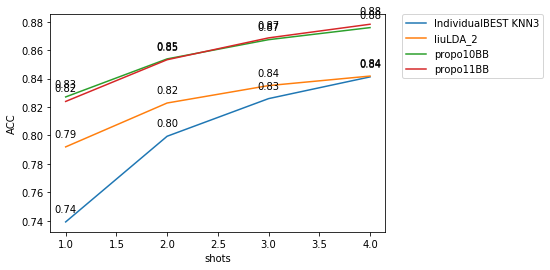

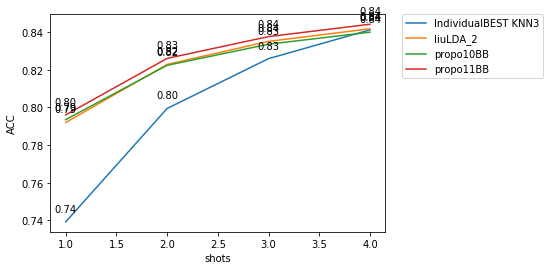

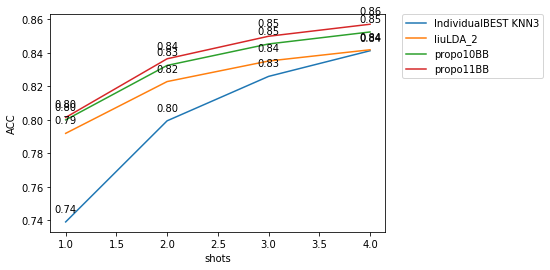

In [17]:
shot=np.arange(1,5)



def graph(Classifier,FeatureSet):

#     Model='Individual'
#     Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
#     plt.plot(shot,Y,label=Model)

#     # zip joins x and y coordinates in pairs
#     for x,y in zip(shot,Y):

#         label = "{:.2f}".format(y)

#         plt.annotate(label, # this is the text
#                      (x,y), # this is the point to label
#                      textcoords="offset points", # how to position the text
#                      xytext=(0,10), # distance from text to points (x,y)
#                      ha='center') # horizontal alignment can be left, right or center
        
    
    Model='Individual'
    FeatureSetIndi=3
    ClassifierIndi='KNN'
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSetIndi].loc[results['Classifier']==ClassifierIndi])
    plt.plot(shot,Y,label=Model+'BEST'+' '+ClassifierIndi+str(FeatureSetIndi))

    # zip joins x and y coordinates in pairs
    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center


#     Model='liu'   
#     Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
#     plt.plot(shot,Y,label=Model)

#     for x,y in zip(shot,Y):

#         label = "{:.2f}".format(y)

#         plt.annotate(label, # this is the text
#                      (x,y), # this is the point to label
#                      textcoords="offset points", # how to position the text
#                      xytext=(0,10), # distance from text to points (x,y)
#                      ha='center') # horizontal alignment can be left, right or center
    
    Model='liu'
    FeatureSetLiu=2
    ClassifierLiu='LDA'
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSetLiu].loc[results['Classifier']==ClassifierLiu])
    plt.plot(shot,Y,label=Model+'LDA_2')

    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center


    Model='propo10BB'
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
    plt.plot(shot,Y,label=Model)

    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center



    Model='propo11BB'
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
    plt.plot(shot,Y,label=Model)

    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center


#     Model='propoNew'
#     Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
#     plt.plot(shot,Y,label=Model)

#     for x,y in zip(shot,Y):

#         label = "{:.2f}".format(y)

#         plt.annotate(label, # this is the text
#                      (x,y), # this is the point to label
#                      textcoords="offset points", # how to position the text
#                      xytext=(0,10), # distance from text to points (x,y)
#                      ha='center') # horizontal alignment can be left, right or center
    
    
    
#     Model='propoNew2'
#     Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
#     plt.plot(shot,Y,label=Model)

#     for x,y in zip(shot,Y):

#         label = "{:.2f}".format(y)

#         plt.annotate(label, # this is the text
#                      (x,y), # this is the point to label
#                      textcoords="offset points", # how to position the text
#                      xytext=(0,10), # distance from text to points (x,y)
#                      ha='center') # horizontal alignment can be left, right or center


#     plt.xticks(np.arange(1,5,1))
#     plt.yticks(np.arange(0.6,1,0.5))

    plt.xlabel('shots')
    plt.ylabel('ACC')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

Classifier='LDA'
FeatureSet=3
graph(Classifier,FeatureSet)
Classifier='QDA'
FeatureSet=3
graph(Classifier,FeatureSet)
Classifier='KNN'
FeatureSet=3
graph(Classifier,FeatureSet)
Classifier='SVM'
FeatureSet=3
graph(Classifier,FeatureSet)

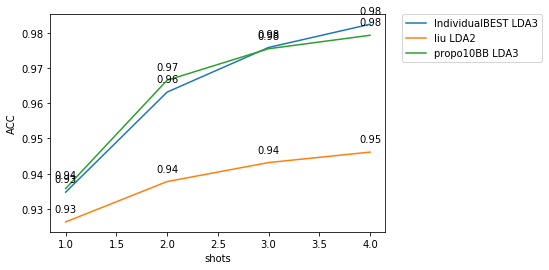

In [118]:
shot=np.arange(1,5)



def graphBest():

#     Model='Individual'
#     Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
#     plt.plot(shot,Y,label=Model)

#     # zip joins x and y coordinates in pairs
#     for x,y in zip(shot,Y):

#         label = "{:.2f}".format(y)

#         plt.annotate(label, # this is the text
#                      (x,y), # this is the point to label
#                      textcoords="offset points", # how to position the text
#                      xytext=(0,10), # distance from text to points (x,y)
#                      ha='center') # horizontal alignment can be left, right or center
        
    
    Model='Individual'
    FeatureSetIndi=3
    ClassifierIndi='LDA'
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSetIndi].loc[results['Classifier']==ClassifierIndi])
    plt.plot(shot,Y,label=Model+'BEST'+' '+ClassifierIndi+str(FeatureSetIndi))

    # zip joins x and y coordinates in pairs
    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center


#     Model='liu'   
#     Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
#     plt.plot(shot,Y,label=Model)

#     for x,y in zip(shot,Y):

#         label = "{:.2f}".format(y)

#         plt.annotate(label, # this is the text
#                      (x,y), # this is the point to label
#                      textcoords="offset points", # how to position the text
#                      xytext=(0,10), # distance from text to points (x,y)
#                      ha='center') # horizontal alignment can be left, right or center
    
    Model='liu'
    FeatureSetLiu=2
    ClassifierLiu='LDA'
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSetLiu].loc[results['Classifier']==ClassifierLiu])
    plt.plot(shot,Y,label=Model+' '+ClassifierLiu+str(FeatureSetLiu))

    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center


    Model='propo10BB'
    FeatureSet10BB=3
    Classifier10BB='LDA'
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
    plt.plot(shot,Y,label=Model+' '+Classifier10BB+str(FeatureSet10BB))

    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center



#     Model='propo11BB'
#     Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
#     plt.plot(shot,Y,label=Model)

#     for x,y in zip(shot,Y):

#         label = "{:.2f}".format(y)

#         plt.annotate(label, # this is the text
#                      (x,y), # this is the point to label
#                      textcoords="offset points", # how to position the text
#                      xytext=(0,10), # distance from text to points (x,y)
#                      ha='center') # horizontal alignment can be left, right or center


#     Model='propoNew'
#     Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
#     plt.plot(shot,Y,label=Model)

#     for x,y in zip(shot,Y):

#         label = "{:.2f}".format(y)

#         plt.annotate(label, # this is the text
#                      (x,y), # this is the point to label
#                      textcoords="offset points", # how to position the text
#                      xytext=(0,10), # distance from text to points (x,y)
#                      ha='center') # horizontal alignment can be left, right or center
    
    
    
#     Model='propoNew2'
#     Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
#     plt.plot(shot,Y,label=Model)

#     for x,y in zip(shot,Y):

#         label = "{:.2f}".format(y)

#         plt.annotate(label, # this is the text
#                      (x,y), # this is the point to label
#                      textcoords="offset points", # how to position the text
#                      xytext=(0,10), # distance from text to points (x,y)
#                      ha='center') # horizontal alignment can be left, right or center


#     plt.xticks(np.arange(1,5,1))
#     plt.yticks(np.arange(0.6,1,0.5))

    plt.xlabel('shots')
    plt.ylabel('ACC')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.('Best')
    plt.show()

graphBest()

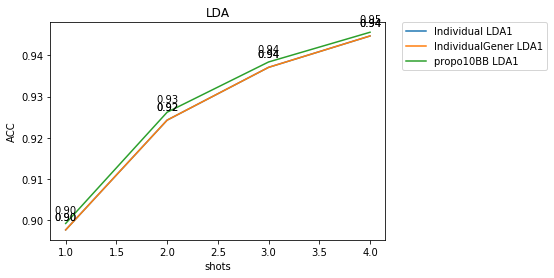

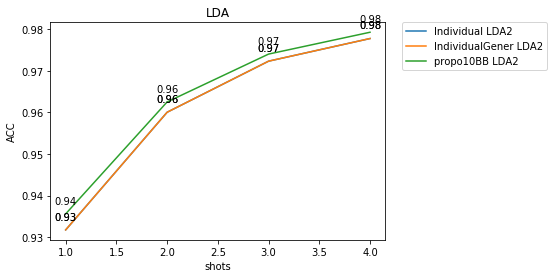

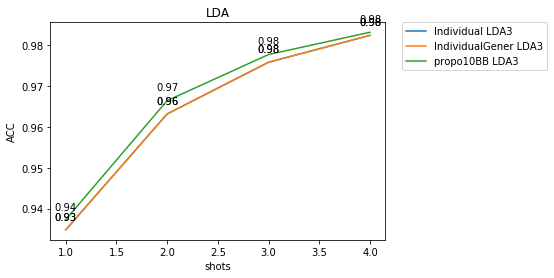

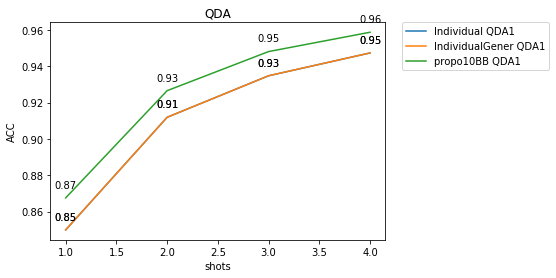

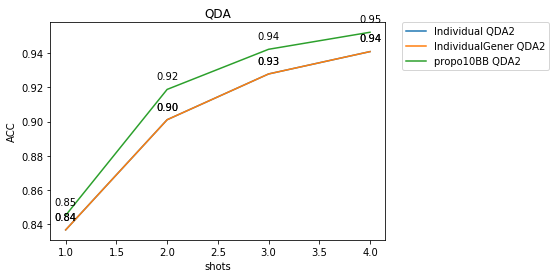

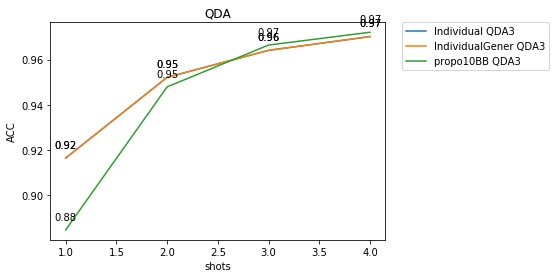

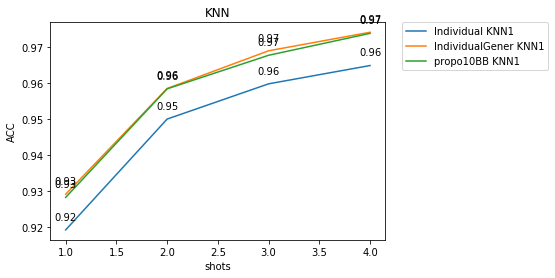

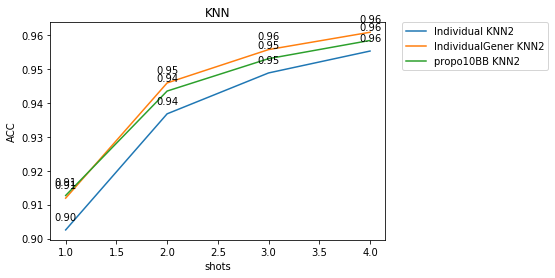

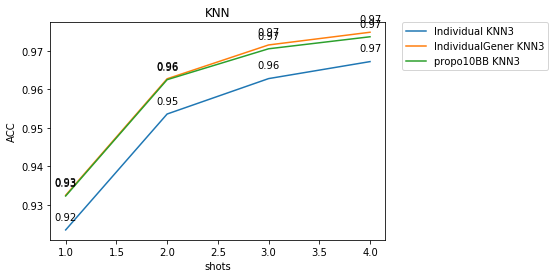

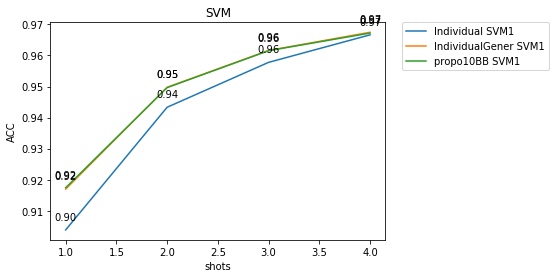

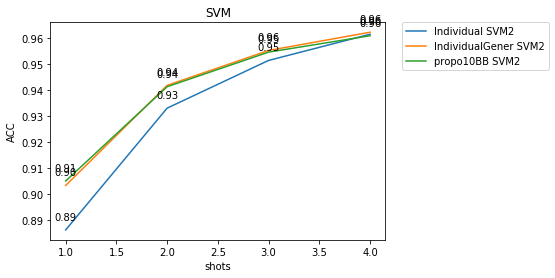

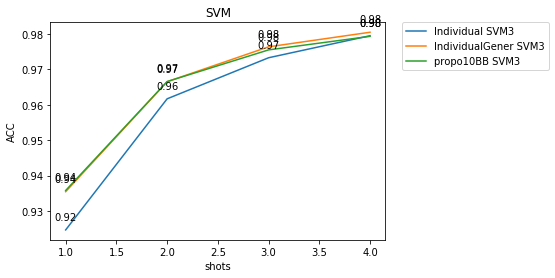

In [121]:
shot=np.arange(1,5)



def graphIndiPropo(Classifier,FeatureSet):

#     Model='Individual'
#     Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
#     plt.plot(shot,Y,label=Model)

#     # zip joins x and y coordinates in pairs
#     for x,y in zip(shot,Y):

#         label = "{:.2f}".format(y)

#         plt.annotate(label, # this is the text
#                      (x,y), # this is the point to label
#                      textcoords="offset points", # how to position the text
#                      xytext=(0,10), # distance from text to points (x,y)
#                      ha='center') # horizontal alignment can be left, right or center
        
    
    Model='Individual'
#     FeatureSetIndi=1
#     ClassifierIndi='SVM'
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
    plt.plot(shot,Y,label=Model+' '+Classifier+str(FeatureSet))

    # zip joins x and y coordinates in pairs
    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
        
    Model='IndividualGener'
#     FeatureSetIndi=1
#     ClassifierIndi='SVM'
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
    plt.plot(shot,Y,label=Model+' '+Classifier+str(FeatureSet))

    # zip joins x and y coordinates in pairs
    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center


#     Model='liu'   
#     Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
#     plt.plot(shot,Y,label=Model)

#     for x,y in zip(shot,Y):

#         label = "{:.2f}".format(y)

#         plt.annotate(label, # this is the text
#                      (x,y), # this is the point to label
#                      textcoords="offset points", # how to position the text
#                      xytext=(0,10), # distance from text to points (x,y)
#                      ha='center') # horizontal alignment can be left, right or center
    
#     Model='liu'
#     FeatureSetLiu=2
#     ClassifierLiu='LDA'
#     Y=np.array(results[Model].loc[results['Feature Set']==FeatureSetLiu].loc[results['Classifier']==ClassifierLiu])
#     plt.plot(shot,Y,label=Model+'LDA_2')

#     for x,y in zip(shot,Y):

#         label = "{:.2f}".format(y)

#         plt.annotate(label, # this is the text
#                      (x,y), # this is the point to label
#                      textcoords="offset points", # how to position the text
#                      xytext=(0,10), # distance from text to points (x,y)
#                      ha='center') # horizontal alignment can be left, right or center


    Model='propo10BB'
    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
    plt.plot(shot,Y,label=Model+' '+Classifier+str(FeatureSet))

    for x,y in zip(shot,Y):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center



#     Model='propo11BB'
#     Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
#     plt.plot(shot,Y,label=Model)

#     for x,y in zip(shot,Y):

#         label = "{:.2f}".format(y)

#         plt.annotate(label, # this is the text
#                      (x,y), # this is the point to label
#                      textcoords="offset points", # how to position the text
#                      xytext=(0,10), # distance from text to points (x,y)
#                      ha='center') # horizontal alignment can be left, right or center


#     Model='propoNew'
#     Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
#     plt.plot(shot,Y,label=Model)

#     for x,y in zip(shot,Y):

#         label = "{:.2f}".format(y)

#         plt.annotate(label, # this is the text
#                      (x,y), # this is the point to label
#                      textcoords="offset points", # how to position the text
#                      xytext=(0,10), # distance from text to points (x,y)
#                      ha='center') # horizontal alignment can be left, right or center
    
    
    
#     Model='propoNew2'
#     Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet].loc[results['Classifier']==Classifier])
#     plt.plot(shot,Y,label=Model)

#     for x,y in zip(shot,Y):

#         label = "{:.2f}".format(y)

#         plt.annotate(label, # this is the text
#                      (x,y), # this is the point to label
#                      textcoords="offset points", # how to position the text
#                      xytext=(0,10), # distance from text to points (x,y)
#                      ha='center') # horizontal alignment can be left, right or center


#     plt.xticks(np.arange(1,5,1))
#     plt.yticks(np.arange(0.6,1,0.5))

    plt.xlabel('shots')
    plt.ylabel('ACC')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title(Classifier)
    plt.show()

Classifier='LDA'
for FeatureSet in range(1,4):
    graphIndiPropo(Classifier,FeatureSet)
Classifier='QDA'
for FeatureSet in range(1,4):
    graphIndiPropo(Classifier,FeatureSet)
Classifier='KNN'
for FeatureSet in range(1,4):
    graphIndiPropo(Classifier,FeatureSet)
Classifier='SVM'
for FeatureSet in range(1,4):
    graphIndiPropo(Classifier,FeatureSet)

In [126]:
x=np.array([[1,2],[3,4],[2,1],[2,4],[2,4],[2,8]])
y=np.array([[5,2],[3,2],[1,1],[4,2],[1,4],[2,2]])
z=np.array([[3,6,7,8],[3,3,3,3],[1,1,12,2],[14,12,6,3],[1,4,12,4],[2,12,4,6]])
print()
print(np.mean(np.concatenate((x,y)),axis=0))
print(np.cov(np.concatenate((x,y)),rowvar=False))
print(x.mean(axis=0))
print(np.cov(x,rowvar=False))
print(y.mean(axis=0))
print(np.cov(y,rowvar=False))
# # print((np.cov(x,rowvar=False)+np.cov(y,rowvar=False))/2)
# m=np.cov(np.concatenate((x,y)),rowvar=False)
# l=(np.cov(x,rowvar=False)+np.cov(y,rowvar=False))
# print(m)
# print(np.cov(x,rowvar=False))
# print(np.cov(y,rowvar=False))
# # print(l)
# # print(l-m)
# b=np.dot((np.mean(x,axis=0)+np.mean(y,axis=0)),(np.mean(x,axis=0)+np.mean(y,axis=0)))
# a=np.cov(x,rowvar=False)+np.cov(y,rowvar=False)
# c=(np.mean(x,axis=0)+np.mean(y,axis=0))/2
# d=np.dot(np.mean(x,axis=0),np.mean(x,axis=0))+np.cov(x,rowvar=False)
# e=np.dot(np.mean(y,axis=0),np.mean(y,axis=0))+np.cov(y,rowvar=False)
# # print(c)
# xa=np.mean(x,axis=0)
# xb=np.mean(y,axis=0)
# print(xa)
# print(l/m)
# print(m-l)
# two_pass_covariance(x,y)
# print((a+b))
# print(((a+b)/(4))-np.dot(c,c))
# print(((d+e)/(2))-np.dot(c,c))
# print(np.dot(np.dot(np.linalg.inv(a),np.cov(x,rowvar=False)),np.cov(y,rowvar=False)))
# (np.cov(x,rowvar=False)+np.cov(y,rowvar=False)+a)/(2^2)


[2.33333333 3.        ]
[[ 1.51515152 -0.27272727]
 [-0.27272727  3.81818182]]
[2.         3.83333333]
[[0.4        0.4       ]
 [0.4        5.76666667]]
[2.66666667 2.16666667]
[[ 2.66666667 -0.33333333]
 [-0.33333333  0.96666667]]


In [74]:
def two_pass_covariance(data1, data2):
    n = len(data1)

    mean1 = sum(data1) / n
    mean2 = sum(data2) / n

    covariance = 0

    for i1, i2 in zip(data1, data2):
        a = i1 - mean1
        b = i2 - mean2
        covariance += a * b / n
    return covariance

In [122]:
np.mean(np.concatenate((x,y)),axis=0)


array([2.33333333, 3.        ])